## Visualize and Analyze EDX data

In [20]:
from functions import *

#### visualize quickly a map - only works if you have coordinates written

In [ ]:
folder = r"O:\Nlab\Public\DCH-plasma\phosphosulfides_students\Students\Giulia\01_Characterization\layerprobe\anait_0001_BaS_Zr"
filepath = os.path.join(folder, "anait_0001_BR.xlsx")
new_heatmap("Layer 1 Ba Atomic %", filepath=filepath, title = "anait_0001_BR", 
#savepath = os.path.join(folder, "test.html")
)

### Add coordinates to excel files

In [12]:
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0023_Cu\EDX\excels"
filename= "mittma_0022_FR_new"

# if no coordinates were written for this file, but only magnification, spacing, nrow, ncolumns - returns coordinates in the sample
#EDX_coordinates(folder, filename, edge=4)

# if coordinates for 3 points were written, and you want the stage coordinates (for uploading to nomad)
#EDX_stage_coords(folder, filename)

#if coordinates for 3 points were written, and you want the sample coordinates (for further processing locally)
EDX_sample_coords(folder, filename)

#if all coordinates were written, and you want to translate them to sample coordinates (for further processing locally)
#lp_translate_excel(folder, filename) 

mittma_0022_FR_new  - coordinates calculated and saved, but not symmetric
X shift:  -0.05000000000000071
Y shift:  0.4800000000000004


In [35]:
#if more files are done at the same time, and you want to translate them all
folder = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0023_Cu\EDX\excels"
sample = "mittma_0023"
pos = [ "BR",
        "FR",
        #"FL", 
        #"BL"
        ]
names = [sample+"_"+p for p in pos]

# for i in range(0,len(pos)): #uncomment the one you need
for name in names:
    # EDX_coordinates(folder, name, edge=4)
#   EDX_stage_coords(folder, name)
    EDX_sample_coords(folder, name)
    # lp_translate_excel(folder, name)

mittma_0023_BR  - coordinates calculated, translated and saved
mittma_0023_FR  - coordinates calculated and saved, but not symmetric
X shift:  -0.22000000000000064
Y shift:  0.35999999999999943


### loading data from excels file

In [39]:
folder= r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0022_Cu\EDX\excels"
sample= "mittma_0022"
sample_n = 22

pos = ["BR",
        "FR",
        #"FL", 
        #"BL"
        ]
names = [sample+"_"+p for p in pos]

load the data

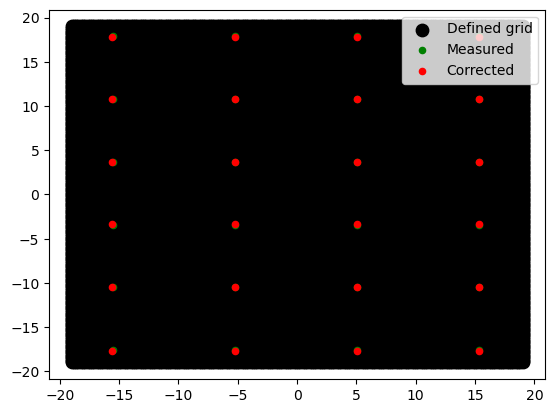

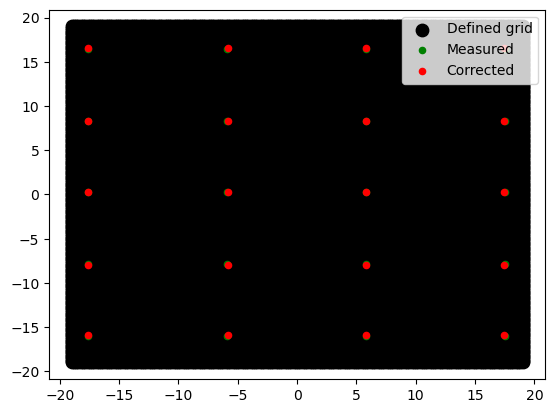

In [40]:
datas = [pd.DataFrame() for _ in pos]

for i in range(0,len(pos)):
    file = sample+"_"+pos[i]+"_sample_coords.xlsx" #change to coords, sample_coords, stage_coords, translated as needed
    filepath = os.path.join(folder, file)
    grid = measurement_grid(200,200,38,38,-19,-19)
    datas[i], coords = read_layerprobe(filepath, grid, sheetname="Sheet1")
    plt.figure()
    plot_grid(coords, grid)

#data__BR, coords_BR = translate_data(datas[0], 20,20)
#data__FR, coords_FR = translate_data(datas[1], 20,-20)
# data__FL, coords_FL = translate_data(datas[2], -20,-20)
# data__BL, coords_BL = translate_data(datas[3], -20,20)

data = combine_data(( datas[0],#data__BR,
                    datas[1],# data__FR,
#                     #  data__FL, 
#                     #  data__BL
                    ))
data0= data.copy()



#### add a column with sample ID to the data

In [4]:
headerlength = len(data0.columns.get_level_values(1).unique())
k=0
data = data0.copy()
for i in range(0, len(data.columns.get_level_values(0).unique())):
    #print(data.columns.get_level_values(0).unique()[i])
    data.insert(headerlength*(i+1)+k, "{}".format(data.columns.get_level_values(0).unique()[i]), sample_n, allow_duplicates=True)
    data.rename(columns={'': 'Sample ID'}, inplace = True)
    k=k+1
new_data = data.copy()
print(data.columns.get_level_values(1))
display(new_data)

Index(['Substrate Si Atomic %', 'Layer 1 Density (g/cm³)',
       'Layer 1 Thickness (nm)', 'Layer 1 P Atomic %', 'Layer 1 S Atomic %',
       'Layer 1 Sb Atomic %', 'Sample ID', 'Substrate Si Atomic %',
       'Layer 1 Density (g/cm³)', 'Layer 1 Thickness (nm)',
       ...
       'Layer 1 S Atomic %', 'Layer 1 Sb Atomic %', 'Sample ID',
       'Substrate Si Atomic %', 'Layer 1 Density (g/cm³)',
       'Layer 1 Thickness (nm)', 'Layer 1 P Atomic %', 'Layer 1 S Atomic %',
       'Layer 1 Sb Atomic %', 'Sample ID'],
      dtype='object', name='Data type', length=588)


Coordinate 3.1000000000000014,4.630000000000001                          \
Data type                 Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                                         100.0                     4.0   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                          149.99              37.29              14.57   

Coordinate                               3.1000000000000014,12.27  \
Data type  Layer 1 Sb Atomic % Sample ID    Substrate Si Atomic %   
0                        48.13         4                    100.0   

Coordinate                                                 ...  \
Data type  Layer 1 Density (g/cm³) Layer 1 Thickness (nm)  ...   
0                              4.0                  167.0  ...   

Coordinate -3.1000000000000014,27.73                                \
Data type         Layer 1 S Atomic % Layer 1 Sb Atomic % Sample ID   
0                              15.26               50.39         4   

Coordinate -3.1000000000000014,35.37                          \
Data type      Substrate Si Atomic % Layer 1 Density (g/cm³)   
0                              100.0                     4.0   

Coordinate                                                               \
Data type  Layer 1 Thickness (nm) Layer 1 P Atomic % Layer 1 S Atomic %   
0                           191.0              33.47              14.59   

Coordinate                                
Data type  Layer 1 Sb Atomic % Sample ID  
0                        51.95         4  

[1 rows x 588 columns]

In [ ]:
info = get_data(new_data, x=15.09,y=29.64)
print(info)

In [23]:
#%% ------------------export pickle to use elsewhere ---------------------

pickle_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\anait_pickles" # change to your pickle path
with open(os.path.join(pickle_path, sample+"_EDS.pkl"), 'wb') as f:
    pickle.dump(new_data, f)

#### plot heatmaps for the whole sample (combined)

In [41]:
#plot for the whole sample
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Cu Atomic %", "Layer 1 P Atomic %", "Layer 1 S Atomic %"] 
for datatype in datatypes:
    savepath = os.path.join(folder, f"{sample} {datatype}.png")
    new_heatmap(datatype, data=data0, title = f"{sample} {datatype}",
        #     exclude=['-36.9,35.37','35.37,-23.53'],
    savepath=savepath,
     )

#### plot a heatmap for each single sample

In [19]:
#plot for single samples
datatypes=["Layer 1 Thickness (nm)", "Layer 1 Cu Atomic %", "Layer 1 P Atomic %", "Layer 1 S Atomic %"] 
#exclude= ['-16.14,-18.24']

for i in range(len(datas)): 
    for datatype in datatypes:
        savepath = os.path.join(folder,"plots", f"{sample}_{pos[i]} {datatype}.png")
        new_heatmap(datatype, data=datas[i], title = f"{sample}_{pos[i]} {datatype}",
        savepath=savepath,
        #exclude =exclude
        )

In [ ]:
data_FL = math_on_columns(datas[1], "Layer 1 P Atomic %", "Layer 1 S Atomic %", "/")
data_FL.rename(columns={'Layer 1 P Atomic % / Layer 1 S Atomic %': 'Bulk P/S ratio '}, inplace = True)
data_FL = math_on_columns(data_FL, "Layer 1 P Atomic %", "Layer 1 S Atomic %", "+")
data_FL = math_on_columns(data_FL, "Layer 1 Cu Atomic %", "Layer 1 P Atomic % + Layer 1 S Atomic %", "/")
data_FL.rename(columns={'Layer 1 Cu Atomic % / Layer 1 P Atomic % + Layer 1 S Atomic %': 'Bulk Cu/anions ratio'}, inplace = True)

display(data_FL)
new_heatmap("Bulk Cu/anions ratio", data=data_FL, title = f"{sample}_FL Bulk Cu/anions ratio",savepath= os.path.join(folderpath, f"{sample}_FL Bulk Cu_anions ratio.png"))

### code in progress

Load .txt file with SE image details into an image_dict. 
May be useful if you again copy image info

In [64]:
file_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\anait_0004_Ba\EDX\anait_0004_BL\coordinates.txt"
# Initialize a dictionary to store the data
image_dict = {}

# Regular expressions to capture the relevant lines
image_pattern = re.compile(r'Label:\s*Electron Image (\d+)')
stage_x_pattern = re.compile(r'Stage X:\s*([-+]?[0-9]*\.?[0-9]+)mm')
stage_y_pattern = re.compile(r'Stage Y:\s*([-+]?[0-9]*\.?[0-9]+)mm')

# Variables to temporarily store the current image and its coordinates
current_image = None
x_coordinate = None
y_coordinate = None

# Read the file and extract the data
with open(file_path, 'r') as file:
    for line in file:
        # Find image number
        image_match = image_pattern.search(line)
        if image_match:
            # If we have a previous image and its coordinates, store them in the dictionary
            if current_image is not None and x_coordinate is not None and y_coordinate is not None:
                image_dict[current_image] = [x_coordinate, y_coordinate]

            # Start a new image
            current_image = int(image_match.group(1))
            x_coordinate = None
            y_coordinate = None

        # Find Stage X
        stage_x_match = stage_x_pattern.search(line)
        if stage_x_match:
            x_coordinate = float(stage_x_match.group(1))

        # Find Stage Y
        stage_y_match = stage_y_pattern.search(line)
        if stage_y_match:
            y_coordinate = float(stage_y_match.group(1))

    # Store the last image and its coordinates after exiting the loop
    if current_image is not None and x_coordinate is not None and y_coordinate is not None:
        image_dict[current_image] = [x_coordinate, y_coordinate]

# Show the dictionary
print(image_dict)


{1: [-14.587, -15.856], 2: [-14.545, -9.252], 6: [-14.381, 17.161], 7: [-4.982, -15.916], 8: [-4.94, -9.312], 19: [14.228, -16.036], 24: [14.434, 16.982]}


In [65]:
# save info from images 1-2-7
ncolumns = 4
nrows = 6
mag= 30000

#accurate "grid vectors"
a = [image_dict[7][0] - image_dict[1][0], image_dict[7][1] - image_dict[1][1]]
b = [image_dict[2][0] - image_dict[1][0], image_dict[2][1] - image_dict[1][1]]

# grid vectors from first corner
space_x = image_dict[7][0] - image_dict[1][0]
space_y = image_dict[2][1] - image_dict[1][1]

#grid vectors from furthest points
spacing_x = (image_dict[19][0] - image_dict[1][0])/(ncolumns-1)
spacing_y = (image_dict[6][1] - image_dict[1][1])/(nrows-1)

#grid vector from point 24, making a square
size_x = image_dict[24][0] - image_dict[1][0]
size_y = image_dict[24][1] - image_dict[1][1]
spacex_div = size_x/(ncolumns-1)
spacey_div = size_y/(nrows-1)

startx= image_dict[1][0]
starty= image_dict[1][1]

area_x = 13.7*30/mag
area_y = 9.4*30/mag

x,y=[],[]
for key in image_dict:
    x.append(image_dict[key][0])
    y.append(image_dict[key][1])


In [66]:

def get_coords(A,B, startx, starty, ncolumns, nrows):
    coord_x = np.round(np.linspace(startx,startx+A*(ncolumns-1), ncolumns), 2)
    coord_y = np.round(np.linspace(starty, starty+B*(nrows-1), nrows), 2)
    X=[]
    Y=[]
    for j in range(0, ncolumns):
        for i in range(0, nrows):
            Y.append(coord_y[i])
            X.append(coord_x[j])
    return X,Y

X_1619,Y_1619 = get_coords(spacing_x,spacing_y, startx, starty, ncolumns, nrows)
X_127,Y_127 = get_coords(space_x,space_y, startx, starty, ncolumns, nrows)
X_24,Y_24 = get_coords(spacex_div,spacey_div, startx, starty, ncolumns, nrows)

Text(0, 0.5, 'Y coordinate (mm)')

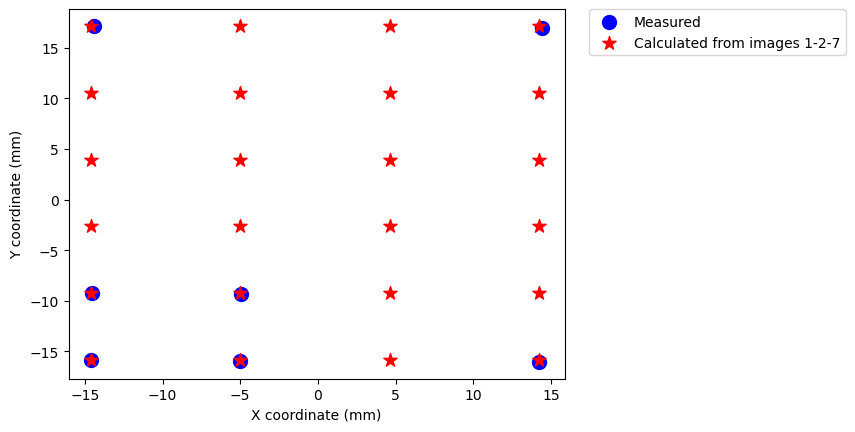

In [68]:
#plt.scatter(X_1619, Y_1619, color='green', label="Calculated from furthest points", s=100)
plt.scatter(x, y, color='blue', label="Measured", s=100)
plt.scatter(X_127, Y_127, color='red', marker='*', label="Calculated from images 1-2-7", s=100) # as in EDX_stage_coords
#plt.scatter(X_24, Y_24, color='pink', marker='x', label="Calculated from image 24", s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("X coordinate (mm)")
plt.ylabel("Y coordinate (mm)")

In [43]:
folder= r"C:\Users\s222531\OneDrive - Danmarks Tekniske Universitet\MASTER_PROJECT_PHOSPHOSULFIDES\results\anait_0004_Ba"
filename= "anait_0004_BR"

EDX_stage_coords(folder,filename)

EDX_sample_coords(folder,filename)

anait_0004_BR  - coordinates calculated and saved
anait_0004_BR  - coordinates calculated, translated and saved
